# NON LINEAR REGRESSION PROBLEM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

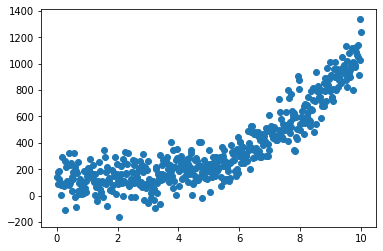

In [2]:
#generating a random data
x = np.linspace(0,10,500)
c = np.random.randn(500)
y = x**3 + c*100 + 100

plt.scatter(x,y)



In [3]:
x.shape

(500,)

In [4]:
y.shape

(500,)

In [5]:
#linear regression model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lg1 = LinearRegression()

In [8]:
# since our training data should be two dimensional 

x1 = x.reshape(-1,1)

In [9]:
x1.shape

(500, 1)

In [11]:
#checking the dimensions
x1.ndim

2

Fitting the Model

In [12]:
lg1.fit(x1,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
pred1 = lg1.predict(x1)

In [14]:
from sklearn.metrics import r2_score

In [15]:
score = r2_score(y,pred1)

In [16]:
print(score)

0.7321452546174427


In [17]:
#since r2_score is not close to one so our model is not working perfectly

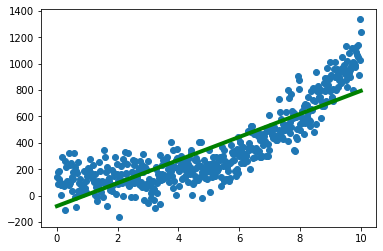

In [18]:
plt.scatter(x,y)
plt.plot(x,pred1,linewidth=4,color="green")

In [19]:
#let's use the polynomial regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(degree=2)

In [23]:
poly_x = poly.fit_transform(x1)


In [24]:
poly_x.shape

(500, 3)

In [25]:
# 3 features because y  = m1x1**2 + m2x1 + b 

In [26]:
lg = LinearRegression()

In [27]:
lg.fit(poly_x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
pred = lg.predict(poly_x)

In [29]:
score2 = r2_score(y,pred)

In [31]:
print(score2)

0.8887137390042631


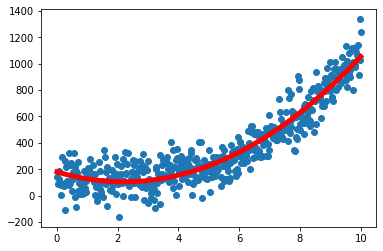

In [32]:
plt.scatter(x,y)
plt.plot(x,pred,linewidth=5,color="red")

In [33]:
#working on the housing dataset

In [34]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [35]:
boston = load_boston()

In [37]:
x = boston.data
y = boston.target

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10)

In [43]:
xtrain

array([[8.87300e-02, 2.10000e+01, 5.64000e+00, ..., 1.68000e+01,
        3.95560e+02, 1.34500e+01],
       [1.35222e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.31420e+02, 1.33300e+01],
       [1.61282e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        2.48310e+02, 2.03400e+01],
       ...,
       [2.37857e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.70730e+02, 1.33400e+01],
       [1.69020e-01, 0.00000e+00, 2.56500e+01, ..., 1.91000e+01,
        3.85020e+02, 1.48100e+01],
       [7.61620e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.92400e+02, 1.04500e+01]])

In [44]:
xtrain.shape

(404, 13)

In [45]:
ytrain.shape

(404,)

In [46]:
lg = LinearRegression()

In [47]:
lg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
train_score = lg.score(xtrain,ytrain)
test_score = lg.score(xtest,ytest)

In [49]:
print(train_score)
print(test_score)

0.750121534530608
0.670933983911564


In [50]:
#its an underfitting problem since the train and test score are both low 

In [51]:
poly = PolynomialFeatures()

In [52]:
poly_train = poly.fit_transform(xtrain)
poly_test = poly.transform(xtest)

In [53]:
poly_train.shape

(404, 105)

In [54]:
lg = LinearRegression()

In [55]:
lg.fit(poly_train,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
training_score = lg.score(poly_train,ytrain)
testing_score = lg.score(poly_test,ytest)

In [59]:
print(training_score," ",testing_score)

0.9319230461477531   0.8749973785958538
